In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_sim = 100
rmin = np.zeros(n_sim)
v_fin = np.zeros([n_sim, 3])
b = np.linspace(0,3,n_sim)
for i in range(n_sim):
    pos = np.load("./XocSimetric_b="+str(b[i])+"_Sig_1_Eps_1_Niter_7500_tstep_0.001_Integr_Euler/positions.npy")
    vel = np.load("./XocSimetric_b="+str(b[i])+"_Sig_1_Eps_1_Niter_7500_tstep_0.001_Integr_Euler/velocities.npy")

    v_fin[i] = vel[0,:,-1]
    relpos = pos[1] - pos[0]
    dist = np.linalg.norm(relpos, axis=0)
    rmin[i] = np.amin(dist)

In [3]:
x_eix = np.array([1,0,0])
y_eix = np.array([0,1,0])
scalar = np.dot(v_fin,x_eix)
cosangle = np.divide(scalar, np.linalg.norm(v_fin, axis = 1))
sinangle = np.divide(np.dot(v_fin,y_eix), np.linalg.norm(v_fin, axis = 1))

In [4]:
plt.scatter(2*b,180*np.arctan2(sinangle,cosangle)/np.pi, s=10)

x = np.linspace(0,3,200)
cosy = np.minimum(2*x**2 - 1, 1)
y = np.arccos(cosy)/(2*np.pi)*360
plt.plot(2*x,y)

plt.legend(("Sphere $R=\sigma/2$", "Lennard-Jones"))

#plt.plot(np.arccos(cosangle))
#plt.plot(np.arcsin(sinangle))
plt.title("Collision under Lennard-Jones potential ($v_\infty=1$)")
plt.xlabel("Impact Parameter in proportion to $\sigma/2$ ($2b/\sigma$)")
plt.ylabel("Scattering Angle $ \Theta $ (º)")
plt.yticks(np.arange(-180, 181, 60))
plt.savefig("Lennard-Jones_collision.jpg")
plt.show()

In [64]:
#Compte en executar-lo si n_sim és gran
rmin = np.zeros(n_sim)
for i in range(n_sim):
    pos = np.load("./XocSimetric"+str(i)+"_Sig_1_Eps_1_Niter_7500_tstep_0.001_Integr_Euler/positions.npy")
    vel = np.load("./XocSimetric"+str(i)+"_Sig_1_Eps_1_Niter_7500_tstep_0.001_Integr_Euler/velocities.npy")

    relpos = pos[1] - pos[0]
    dist = np.linalg.norm(relpos, axis=0)
    rmin[i] = np.amin(dist)
    plt.plot(dist[1200:3000])
plt.show()

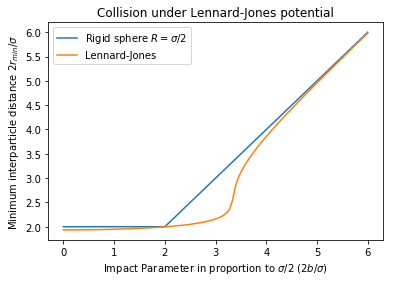

In [5]:
plt.plot(2*b,np.maximum(2, 2*b))
plt.plot(2*b,2*rmin)

plt.legend(("Rigid sphere $R=\sigma/2$", "Lennard-Jones"))
plt.title("Collision under Lennard-Jones potential")
plt.xlabel("Impact Parameter in proportion to $\sigma/2$ ($2b/\sigma$)")
plt.ylabel("Minimum interparticle distance $ 2r_{min}/\sigma $")
plt.savefig("Lennard-Jones_minimum_dist.jpg")
plt.show()

In [6]:
x_teor = (1+np.sqrt(1+vel[0,0,0]**2))/2
r_teor = np.power(x_teor, -1/6)
print(rmin[0], r_teor)

0.967086447288 0.969115898699


In [7]:
b[5]

0.15151515151515152

In [8]:
rmin[5]

0.96768003466332975

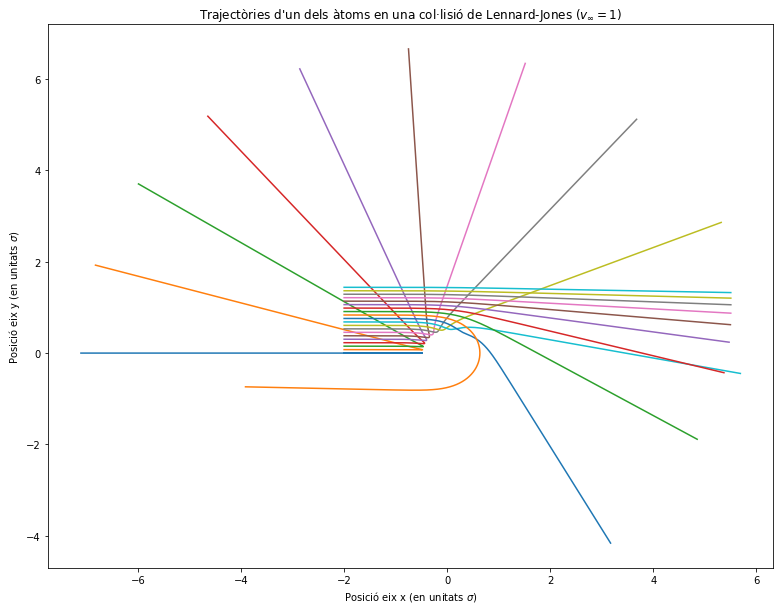

In [175]:
plt.figure(figsize=(13,10))
for i in range(20):
    pos = np.load("./XocSimetric_b="+str(b[5*i])+"_Sig_1_Eps_1_Niter_7500_tstep_0.001_Integr_Euler/positions.npy")
    vel = np.load("./XocSimetric_b="+str(b[5*i])+"_Sig_1_Eps_1_Niter_7500_tstep_0.001_Integr_Euler/velocities.npy")

    posAxy = pos[0,0:2]
    plt.plot(posAxy[0],posAxy[1])
plt.title("Trajectòries d'un dels àtoms en una col·lisió de Lennard-Jones ($v_\infty = 1$)")
plt.xlabel("Posició eix x (en unitats $\sigma$)")
plt.ylabel("Posició eix y (en unitats $\sigma$)")
plt.savefig("20Xocs_Lennard-Jones.jpg")
plt.show()

In [177]:
posAxy = np.zeros((4, 2, 7500))
posBxy = np.zeros((4, 2, 7500))
analize = [20,40,55,70]
for i in range(4):
    pos = np.load("./XocSimetric_b="+str(b[analize[i]])+"_Sig_1_Eps_1_Niter_7500_tstep_0.001_Integr_Euler/positions.npy")
    vel = np.load("./XocSimetric_b="+str(b[analize[i]])+"_Sig_1_Eps_1_Niter_7500_tstep_0.001_Integr_Euler/velocities.npy")

    posAxy[i] = pos[0,0:2]
    posBxy[i] = pos[1,0:2]

In [178]:
np.shape(posAxy)

(4, 2, 7500)

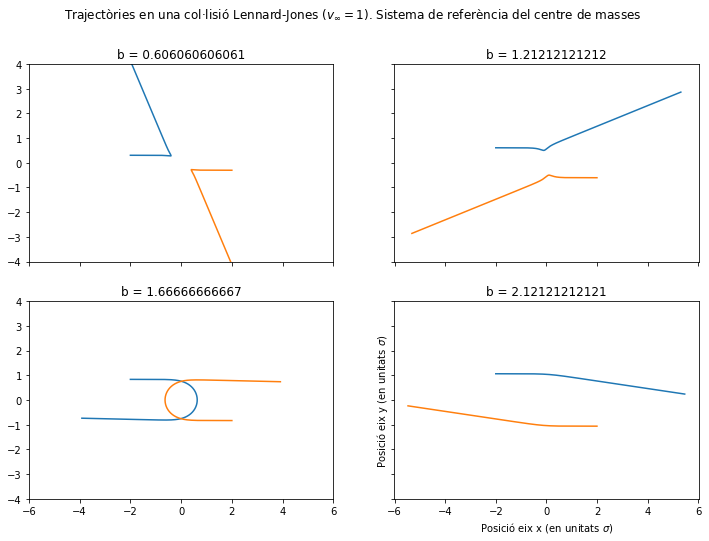

In [180]:
# row and column sharing

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize = (12,8))

ax1.plot(posAxy[0,0], posAxy[0,1])
ax1.plot(posBxy[0,0], posBxy[0,1])
ax1.set_ylim([-4,4])
ax1.set_title('b = '+ str(b[analize[0]]))
ax2.plot(posAxy[1,0], posAxy[1,1])
ax2.plot(posBxy[1,0], posBxy[1,1])
ax2.set_title('b = '+ str(b[analize[1]]))
ax3.set_ylim([-4,4])
ax3.set_xlim([-6,6])
ax3.plot(posAxy[2,0], posAxy[2,1])
ax3.plot(posBxy[2,0], posBxy[2,1])
ax3.set_title('b = ' + str(b[analize[2]]))
ax4.plot(posAxy[3,0], posAxy[3,1])
ax4.plot(posBxy[3,0], posBxy[3,1])
ax4.set_title('b = ' + str(b[analize[3]]))
plt.suptitle("Trajectòries en una col·lisió Lennard-Jones ($v_\infty = 1$). Sistema de referència del centre de masses")
plt.xlabel("Posició eix x (en unitats $\sigma$)")
plt.ylabel("Posició eix y (en unitats $\sigma$)")

plt.savefig("4Xocs_Lennard-Jones.jpg")

plt.show()